# EE 379K: Lab 8

## Rohan Nagar and Wenyang Fu

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import (cross_val_score, train_test_split,
                                    GridSearchCV, RandomizedSearchCV)
from sklearn.preprocessing import Imputer

%load_ext autoreload
%autoreload 2

/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [37]:
def to_file(filename, preds):
    with open(filename, 'w') as f:
        f.write('Id,Probability\n')
        for num, pred in zip(range(1,101504), preds):
            f.write('{},{}\n'.format(num, pred))

# Question 1

Some of the features we gave you are pure noise. Which ones? Find them and remove them.

## The features F1, F6-9, F11-13, F16-18 are noise


In [44]:
def show_feature_dist(df):
    """ Plot the distribution for each feature. """
    fig = plt.figure(figsize=(20, 15))
    cols = 5
    rows = np.ceil(float(df.shape[1]) / cols)
    for i, col in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(col)
        if df.dtypes[col] == np.object:
            df[column].value_counts().plot(
                kind="bar", axes=ax)
        else:
            df[col].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.show()

In [45]:
train = pd.read_csv('data/train_final.csv')
test = pd.read_csv('data/test_final.csv')

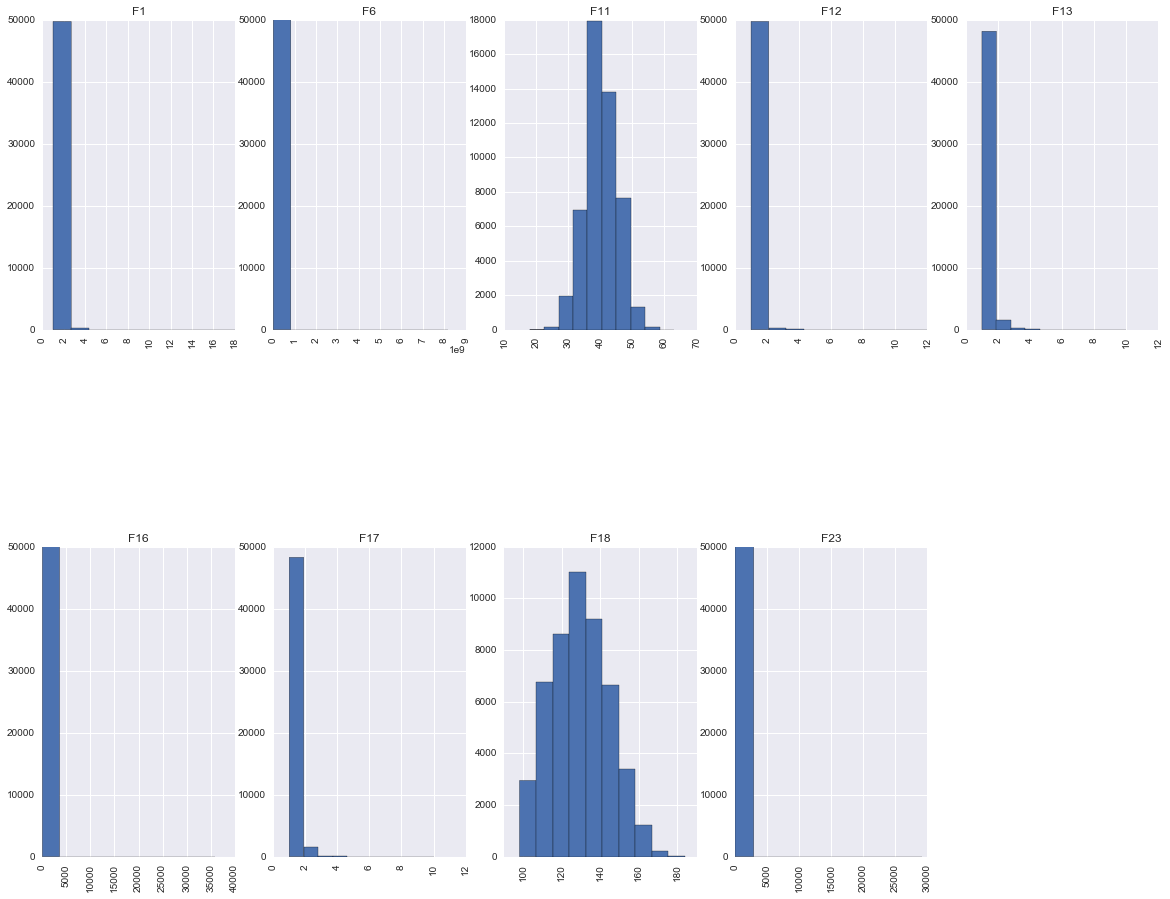

In [52]:
train_noisy = train.ix[:, ['F1', 'F6', 'F11', 'F12', 'F13', 'F16', 'F17', 'F18', 'F23']]
show_feature_dist(train_noisy)

In [47]:
def get_unique_values(df, feat):
    """Given a dataframe and feature name, 
       display all unique values of a particular feature. """
    feat, uniques = feat, sorted(df.ix[:, feat].unique())
    print('{}: {}'.format(feat, uniques))
    return feat, uniques

_, f2_uniques = get_unique_values(train, 'F2')

F2: [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 96, 98]


In [48]:
# Help from: http://stackoverflow.com/questions/13129618/histogram-values-of-a-pandas-series

import numpy as np

bins=f2_uniques
count, division = np.histogram(train.ix[:, 'F2'], bins=bins)
print(count)

[47470  1905   379   104    32     9     6     1     1     1    90]


In [51]:
_, f8_uniques = get_unique_values(train, 'F8')

bins=f8_uniques
count, division = np.histogram(train.ix[:, 'F8'], bins=bins)
print(count)

F8: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[48281  1465   188    42    11     6     2     3]


# Question 2

Some of the features are noisy versions of other features. Which ones? Find them and remove them.

In [103]:
train_corr = train.corr()
train_corr[train_corr > 0.2]

,id,Y,F1,F2,F3,F4,F5,F6,F7,F8,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F2,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.986766,NaN,NaN
F3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
F4,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F5,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


F3 and F23 are perfectly correlated. Also, F2, F14, and F25 are highly correlated with >.987 correlation score. We can say that these features are noisy versions of each other. We will try removing them in question 3 and see if it improves our score.

# Question 3

Retrain your models using this information. Merge models with your lab partner and report your best private score. Does removing the noise features improve your performance?

In [58]:
def submit(filename, ids, preds):
    with open(filename, 'w') as f:
        f.write('id,Y\n')
        for num, pred in zip(ids, preds):
            f.write('{},{}\n'.format(num, pred))

In [72]:
# Fill NA values with the mean
train = train.fillna(train.mean())
test = test.fillna(train.mean())

X_train = train.drop(['id', 'Y'], axis=1)
y_train = train['Y']

X_test = test.drop(['id'], axis=1)
ids = test['id']

In [64]:
import xgboost as xgb

xg = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01,
                       min_child_weight=5, gamma=.8, subsample=.4,
                       reg_alpha=.5, colsample_bytree=.4, reg_lambda=.93)
xg.fit(X_train, y_train)
preds = xg.predict_proba(X_test)[:, 1]
submit('submissions/q3/no_drops.csv', ids, preds)

### Private score: $0.85926$

This is our score using Raymond's best parameters for XGB

In [65]:
feat_importances = xg.feature_importances_
zipped_importances = zip(X_train.columns, feat_importances)
sorted(zipped_importances, key=lambda x: x[1], reverse=True)

[('F23', 0.11621957),
 ('F27', 0.10260008),
 ('F3', 0.0959967),
 ('F19', 0.089888565),
 ('F18', 0.078250103),
 ('F22', 0.06661164),
 ('F25', 0.057614528),
 ('F14', 0.048947584),
 ('F26', 0.048204705),
 ('F2', 0.046801485),
 ('F10', 0.046141148),
 ('F11', 0.044737928),
 ('F6', 0.039620306),
 ('F16', 0.027073875),
 ('F21', 0.026330994),
 ('F9', 0.023607099),
 ('F5', 0.023359472),
 ('F20', 0.0033016922),
 ('F4', 0.002971523),
 ('F17', 0.0023111845),
 ('F7', 0.0021460999),
 ('F12', 0.0015683038),
 ('F1', 0.0014032192),
 ('F8', 0.0011555923),
 ('F15', 0.0011555923),
 ('F13', 0.00107305),
 ('F24', 0.00090796535)]

Now we can drop the features that we were told are noisy.

In [73]:
# Drop noisy features
X_train_drop = X_train.drop(['F1', 'F6', 'F11', 'F12', 'F13', 'F16', 'F17', 'F18'], axis=1)
X_test_drop = X_test.drop(['F1', 'F6', 'F11', 'F12', 'F13', 'F16', 'F17', 'F18'], axis=1)

In [91]:
xg = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01,
                       min_child_weight=5, gamma=.8, subsample=.4,
                       reg_alpha=.5, colsample_bytree=.4, reg_lambda=.93)
xg.fit(X_train_drop, y_train)
preds = xg.predict_proba(X_test_drop)[:, 1]
submit('submissions/q3/first.csv', ids, preds)

### Private Score: $0.85942$

Dropping these definitely helped. Let's try to drop some more based on feature importances.

In [75]:
X_train_drop_more = X_train_drop.drop(['F8', 'F15', 'F24'], axis=1)
X_test_drop_more = X_test_drop.drop(['F8', 'F15', 'F24'], axis=1)

In [69]:
xg = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01,
                       min_child_weight=5, gamma=.8, subsample=.4,
                       reg_alpha=.5, colsample_bytree=.4, reg_lambda=.93)
xg.fit(X_train_drop_more, y_train)
preds = xg.predict_proba(X_test_drop_more)[:, 1]
submit('submissions/q3/drop_low_importance.csv', ids, preds)

### Private Score: $0.85914$

We did a little worse than when we just dropped the features that we know are noise.

In [76]:
X_train_drop_more = X_train_drop.drop(['F23'], axis=1)
X_test_drop_more = X_test_drop.drop(['F23'], axis=1)

In [80]:
xg = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01,
                       min_child_weight=5, gamma=.8, subsample=.4,
                       reg_alpha=.5, colsample_bytree=.4, reg_lambda=.93)
xg.fit(X_train_drop_more, y_train)
preds = xg.predict_proba(X_test_drop_more)[:, 1]
submit('submissions/q3/drop_f23.csv', ids, preds)

### Private Score: $0.85809$

Dropping F23 dropped our score by a lot, even though it was a duplicate of F3.

In [81]:
X_train_drop_more = X_train_drop.drop(['F2', 'F14'], axis=1)
X_test_drop_more = X_test_drop.drop(['F2', 'F14'], axis=1)

In [82]:
xg = xgb.XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.01,
                       min_child_weight=5, gamma=.8, subsample=.4,
                       reg_alpha=.5, colsample_bytree=.4, reg_lambda=.93)
xg.fit(X_train_drop_more, y_train)
preds = xg.predict_proba(X_test_drop_more)[:, 1]
submit('submissions/q3/drop_f2_f14.csv', ids, preds)

### Private Score: $0.83660$

These features are noisy but they help with the final prediction because their predictive power is strong, just as in the case of F23 and F3.

Let's merge our models.

In [101]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

params = {'n_estimators': 500,
          'max_features': 'sqrt',
          'max_depth': 8,
          'min_samples_split': 15,
          'min_samples_leaf': 10
          }

rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_features=params['max_features'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf']
    )
eclf = VotingClassifier(estimators=[('rf', rf), ('xgb', xg)], voting='soft', n_jobs=-1)
eclf.fit(X_train_drop, y_train)
eclf.predict_proba(X_test_drop)[:, 1]
submit('submissions/q3/merged.csv', ids, preds)

After merging our models together (The best XGB and the best Random Forest), we got the same private score of 0.85942. This is probably because our models are highly correlated.

# Question 4

Write a post on the inclass Kaggle forums that contains some cool data science. Include your post in your report. Your post can be written by two people like your lab report.

# Cool Data Science:

We tried a Bagging classifier using Raymond Wen's best XGBoost parameters. When we bagged 10 XGBoost models and had them each sample from all of the data (with replacement), we noticed no noticeable improvement in leaderboard score. Perhaps a bagged estimator would also benefit from more model diversity, e.g., using 10 XGBoost models trained with different hyperparameters, and training them each on different portions of the data, and lastly ensembling them with a weighted majority vote based on CV-score. Wenyang successfully used this technique to improve his score by a fair margin of .00150, but it seems that Raymond's hyperparams don't benefit nearly as much from this technique.

In [102]:
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(xg, n_estimators=30, n_jobs=-1)
classifier.fit(X_train_drop, y_train)
classifier.predict_proba(X_test_drop)[:, 1]
submit('submissions/q3/bagged_30.csv', ids, preds)

# Question 5

Have a look here: 

https://www.kaggle.com/c/GiveMeSomeCredit

What is the best private score you can get for this competition? Include a screenshot of your submissions with scores in your lab report.

In [84]:
cs_train = pd.read_csv('cs-training.csv', index_col=0)
cs_test = pd.read_csv('cs-test.csv', index_col=0)

In [85]:
# Drop dependent variable in test
cs_test = cs_test.drop(['SeriousDlqin2yrs'], axis=1)

In [86]:
# Fill missing with mean
cs_train = cs_train.fillna(cs_train.mean())
cs_test = cs_test.fillna(cs_train.mean())

In [87]:
# Seperate dependent and independent
cs_X_train = cs_train.drop(['SeriousDlqin2yrs'], axis=1)
cs_y_train = cs_train['SeriousDlqin2yrs']

In [88]:
from sklearn.preprocessing import FunctionTransformer

# Perform a log transform on the data
transformer = FunctionTransformer(np.log1p)
cs_X_train = transformer.transform(cs_X_train)
cs_test = transformer.transform(cs_test)

In [104]:
import xgboost as xgb

# XGB
xg = xgb.XGBClassifier(max_depth=8, learning_rate=0.3, n_estimators=155,
                       min_child_weight=0.6, subsample=1.0, colsample_bytree=0.45)
xg.fit(cs_X_train, cs_y_train)
preds = xg.predict_proba(cs_test)[:, 1]
to_file('submissions/q5/xgb.csv', preds)

In [105]:
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(xg, n_estimators=10, n_jobs=-1)
classifier.fit(cs_X_train, cs_y_train)
classifier.predict_proba(cs_test)[:, 1]
to_file('submissions/q5/bagged_10.csv', preds)

Our highest private score with 10 bagged XGBoost models is 0.855643. We did this by filling missing values with the mean and also taking the log transform of all the features. We then fit an XGB and bagged 10 of them together. The screenshot is shown below.

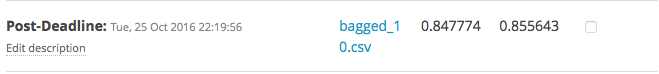

In [106]:
from IPython.display import Image
Image("best_score.png")